In [1]:
import scanpy as sc
import pandas as pd
import scipy.io as scipy
import celltypist
from celltypist import models
import anndata
import matplotlib.pyplot as plt

In [4]:
matrix = scipy.mmread('/Users/gagled01/morganLab/Waldenstroms/singlecell/textfiles_csvs/scRNA_SCTransformIntegrated_sparseMatrix.mtx')
gene_list = pd.read_table('/Users/gagled01/morganLab/Waldenstroms/singlecell/textfiles_csvs/scRNA_SCTransformIntegrated_geneNames.txt', header = None)
cell_list = pd.read_table('/Users/gagled01/morganLab/Waldenstroms/singlecell/textfiles_csvs/scRNA_SCTransformIntegrated_cellNames.txt', header = None)

In [5]:
models.download_models(force_update = True)
model = models.Model.load(model = 'Immune_All_Low.pkl') # low hierarchy = high resolution

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 19
📂 Storing models in /Users/gagled01/.celltypist/data/models
💾 Downloading model [1/19]: Immune_All_Low.pkl
💾 Downloading model [2/19]: Immune_All_High.pkl
💾 Downloading model [3/19]: Adult_Mouse_Gut.pkl
💾 Downloading model [4/19]: Autopsy_COVID19_Lung.pkl
💾 Downloading model [5/19]: COVID19_HumanChallenge_Blood.pkl
💾 Downloading model [6/19]: COVID19_Immune_Landscape.pkl
💾 Downloading model [7/19]: Cells_Fetal_Lung.pkl
💾 Downloading model [8/19]: Cells_Intestinal_Tract.pkl
💾 Downloading model [9/19]: Cells_Lung_Airway.pkl
💾 Downloading model [10/19]: Developing_Human_Brain.pkl
💾 Downloading model [11/19]: Developing_Human_Thymus.pkl
💾 Downloading model [12/19]: Developing_Mouse_Brain.pkl
💾 Downloading model [13/19]: Healthy_COVID19_PBMC.pkl
💾 Downloading model [14/19]: Human_IPF_Lung.pkl
💾 Downloading model [15/19]: Human_Lung_Atlas.pkl
💾 Downloading model [16/19]: Huma

In [7]:
# need to put absolute path in here apparently...bugs out if i use variable to path, despite the tutorial using a variable
# also need gene and cell files for this

# important to transpose so that the files match up
matrix = matrix.T 
predictions = celltypist.annotate(filename = '/Users/gagled01/morganLab/Waldenstroms/singlecell/textfiles_csvs/scRNA_SCTransformIntegrated_sparseMatrix.mtx',
                                  gene_file = '/Users/gagled01/morganLab/Waldenstroms/singlecell/textfiles_csvs/scRNA_SCTransformIntegrated_geneNames.txt',
                                  cell_file = '/Users/gagled01/morganLab/Waldenstroms/singlecell/textfiles_csvs/scRNA_SCTransformIntegrated_cellNames.txt',
                                  model = 'Immune_All_Low.pkl', majority_voting = True, transpose_input = True)

📁 Input file is '/Users/gagled01/morganLab/Waldenstroms/singlecell/textfiles_csvs/scRNA_SCTransformIntegrated_sparseMatrix.mtx'
⏳ Loading data
🔬 Input data has 92019 cells and 28231 genes
🔗 Matching reference genes in the model
🧬 5985 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
⛓️ Over-clustering input data with resolution set to 20
🗳️ Majority voting the predictions
✅ Majority voting done!


In [8]:
predictions.predicted_labels
adata = predictions.to_adata()
adata.obs

,predicted_labels,over_clustering,majority_voting,conf_score
AAACCCAAGGCGTCCT-1_1_1,Regulatory T cells,53,Regulatory T cells,0.918339
AAACCCAAGGGTTTCT-1_1_1,Naive B cells,232,Naive B cells,0.998430
AAACCCAAGGTGCTAG-1_1_1,Proliferative germinal center B cells,168,Proliferative germinal center B cells,0.999856
AAACCCAAGTCCGTCG-1_1_1,MAIT cells,236,MAIT cells,0.827527
AAACCCACAAGTGACG-1_1_1,Proliferative germinal center B cells,89,Proliferative germinal center B cells,0.643422
...,...,...,...,...
TTTGTTGGTAACTACG-1_7_2,Memory B cells,27,Memory B cells,0.969871
TTTGTTGGTGATCAGC-1_7_2,Memory B cells,118,Memory B cells,0.905406
TTTGTTGGTGCGCAAT-1_7_2,Memory B cells,103,Memory B cells,0.677006
TTTGTTGGTTACAAAC-1_7_2,Memory B cells,85,Memory B cells,0.999906


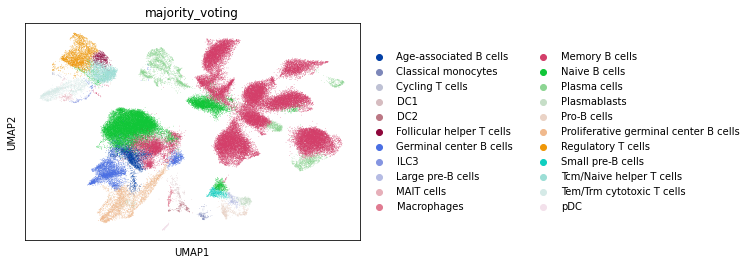

In [9]:
sc.tl.umap(adata)
sc.pl.umap(adata, color = ['majority_voting'], legend_loc = 'right margin')
#fig.set_canvas(plt.gcf().canvas)


In [10]:
anndata.AnnData.write(adata, filename = '/Users/gagled01/morganLab/Waldenstroms/singlecell/scRNA_SCTransformIntegrated_CellTypistAnnotated.h5ad')